# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/spam_or_not_spam.csv')
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [2]:
bar_data = data.groupby('label', as_index=False).count()
bar_data

,label,email
0,0,2500
1,1,499


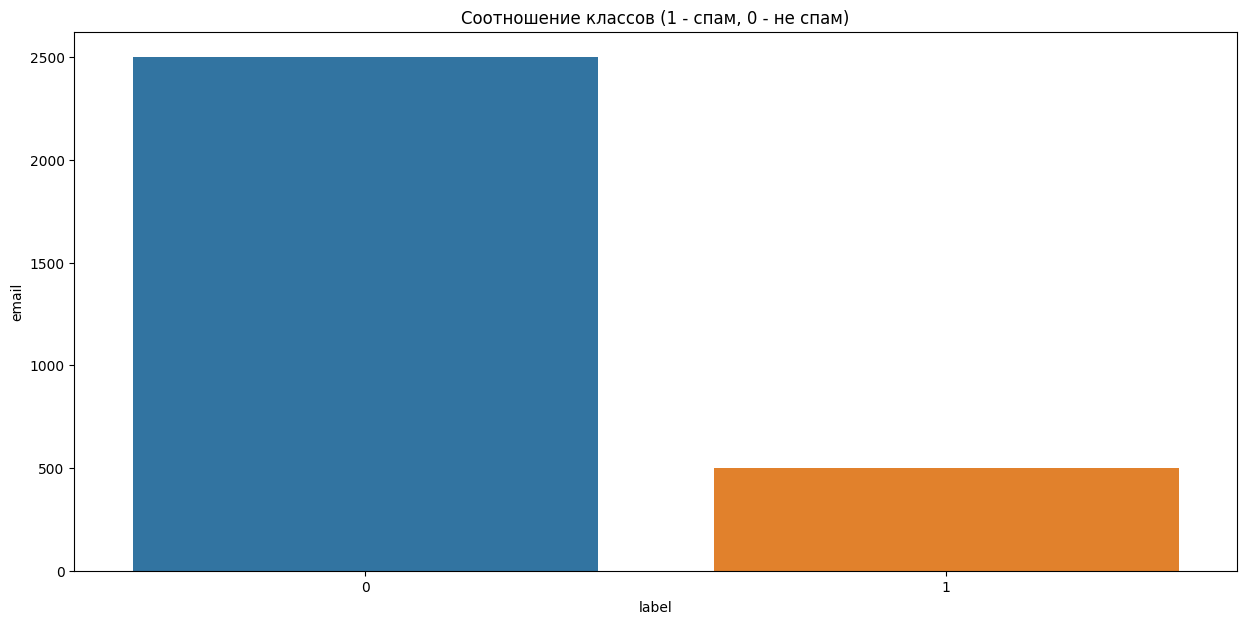

In [3]:
fig = plt.figure(figsize=(15, 7))
barplot = sns.barplot(
    data=bar_data,
    x='label',
    y='email')
barplot.set_title('Соотношение классов (1 - спам, 0 - не спам)');

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [4]:
data = data.dropna(axis=0)

Переводим данные в векторный вид:

In [8]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [11]:
X.shape

(2999, 34116)

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [12]:
X = X
y = data['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [14]:
y_test.mean()

0.164

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [15]:
from sklearn.naive_bayes import ComplementNB
NB = ComplementNB(alpha=0.01)
NB.fit(X_train, y_train)

ComplementNB(alpha=0.01)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [16]:
from sklearn import metrics
y_test_pred = NB.predict(X_test)
print('Test Accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Test Precision: {:.3f}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Test Recall: {:.3f}'.format(metrics.recall_score(y_test, y_test_pred)))
print('Test F1-score: {:.3f}'.format(metrics.f1_score(y_test, y_test_pred)))

Test Accuracy: 0.995
Test Precision: 0.984
Test Recall: 0.984
Test F1-score: 0.984


Нарисуйте ROC-кривую:

d:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
d:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
d:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
d:\Program Files\Python311\Lib\site-pack

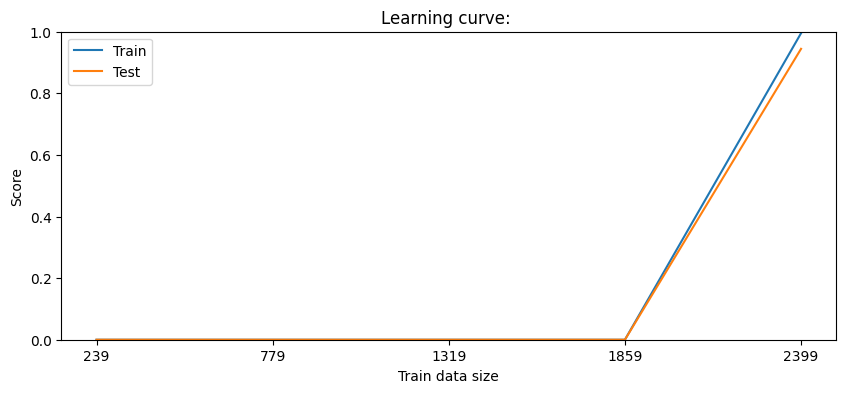

In [20]:
from sklearn import model_selection
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, test_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, test_scores_mean, label="Test")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()
    
#Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
plot_learning_curve(NB, X, y, skf)

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [22]:
alpha = [0.01, 0.05, 0.1, 0.5]

for a in alpha:
    NB = ComplementNB(alpha=a)
    NB.fit(X_train, y_train)
    kf = model_selection.KFold(n_splits=5)
    cv_metrics = model_selection.cross_validate(
        estimator=NB, #модель
        X=X, #матрица наблюдений X
        y=y, #вектор ответов y
        cv=kf, #кросс-валидатор
        scoring='accuracy', #метрика
        return_train_score=True #подсчёт метрики на тренировочных фолдах
    )
    print('Alpha = {}'.format(a))
    print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
    print('Test k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['test_score'])))
    print('\n')

Alpha = 0.01
Train k-fold mean accuracy: 1.00
Test k-fold mean accuracy: 0.82


Alpha = 0.05
Train k-fold mean accuracy: 1.00
Test k-fold mean accuracy: 0.82


Alpha = 0.1
Train k-fold mean accuracy: 1.00
Test k-fold mean accuracy: 0.82


Alpha = 0.5
Train k-fold mean accuracy: 1.00
Test k-fold mean accuracy: 0.82


